In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import log, pi
pd.set_option('display.max_rows', None)

In [34]:
m = 7.164
k = 1389
P = 0.0256
a = (k/m)**0.5
T = (2*pi)/a
print("a =",round(a,3), "1/s")
print("T =",round(T,3), "s")
6400/6280*a

a = 13.924 1/s
T = 0.451 s


In [35]:
df_swobodne = pd.read_csv("drgania_swobodne.csv")
df_swobodne["lnA"] = [round(log(abs(i)),4) for i in df_swobodne["Amplituda"]]
df_swobodne["t^2"] = [round(i**2,4) for i in df_swobodne["Czas"]]
df_swobodne["tlnA"] = [round(i*j,4) for i, j in zip(df_swobodne["Czas"], df_swobodne["lnA"])]

T = [2*(j-i) for i,j in zip(df_swobodne["Czas"][:-1], df_swobodne["Czas"][1:])]
T = round(sum(T)/len(T),4)
print("T =", T,"s")

czestosc_lambda = 2*pi/T
print("czestosc_lambda =", round(czestosc_lambda,4), "rad/s")

df_swobodne

T = 0.4536 s
czestosc_lambda = 13.8518 rad/s


,Czas,Amplituda,lnA,t^2,tlnA
0,0.867,36.9037,3.6083,0.7517,3.1284
1,1.093,-30.3050,3.4113,1.1946,3.7286
2,1.320,22.6993,3.1223,1.7424,4.1214
3,1.547,-16.3020,2.7913,2.3932,4.3181
4,1.773,9.2010,2.2193,3.1435,3.9348
5,2.001,-4.1800,1.4303,4.0040,2.8620


In [36]:
S1 = sum(df_swobodne["Czas"])
S2 = sum(df_swobodne["lnA"])
S11 = sum(df_swobodne["t^2"])
S12 = sum(df_swobodne["tlnA"])
print("S =", round(S1,4), S2, S11, S12)

D = len(df_swobodne)*S11-S1**2
print("D =", round(D,4))

lnA0 = (S11*S2-S1*S12)/D
print("lnA0 = ", round(lnA0,4))

h = (S1*S2-len(df_swobodne)*S12)/D
print("h =", round(h,4))

S = 8.601 16.5828 13.2294 22.0933
D = 5.3992
lnA0 =  5.4371
h = 1.8649


In [37]:
amplitudy_abs = [round(abs(i),3) for i in df_swobodne["Amplituda"]]
amplitudy_abs


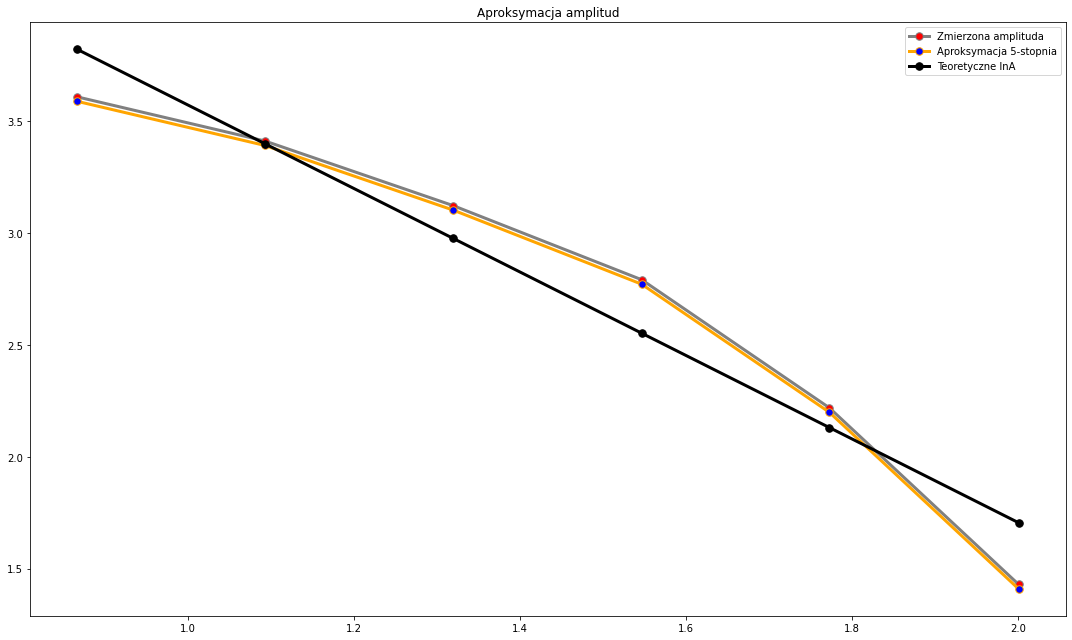

In [38]:
fig, ax = plt.subplots()
ax.clear()
x = df_swobodne["Czas"]
y = [round(log(i),3) for i in amplitudy_abs]
ax.plot(x, y, color='grey', linewidth=3, marker=".", markersize=15, markerfacecolor='red', label="Zmierzona amplituda")
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams["figure.autolayout"] = True

ax.set_title("Logartym naturalny amplitud")

wielomian = np.polyfit(x, y, 5)
y = [np.polyval(wielomian, i)-0.02 for i in x]
ax.plot(x, y, color='orange', linewidth=3, marker=".", markersize=15, markerfacecolor='blue', label="Aproksymacja 5-stopnia")

y = [(lnA0 - h*t) for t in df_swobodne["Czas"]]
ax.plot(x, y, color='black', linewidth=3, marker=".", markersize=15, markerfacecolor='black', label="Teoretyczne lnA")

ax.set_title("Aproksymacja amplitud")
ax.legend()
plt.show()


In [39]:
import sympy as sp
from sympy.abc import x
sp.init_printing()
wspolczynniki = [round(i,5) for i in wielomian]
sp.Poly(reversed(wspolczynniki),x).as_expr()

In [40]:
df_wymuszone = pd.read_csv("drgania_wymuszone.csv")
z = 6400
me = 0.0256
df_wymuszone['Amplituda'] = [round((x+y)/2,3) for x,y in zip(df_wymuszone['First'], df_wymuszone['Second'])]

df_wymuszone["n"] = [f*1000/z for f in df_wymuszone["Czestotliwosc"]]
df_wymuszone["W"] = [2*pi*n for n in df_wymuszone["n"]]
df_wymuszone["W/a"] = [W/a for W in df_wymuszone["W"]]
df_wymuszone["W^2"] = [W**2 for W in df_wymuszone["W"]]
df_wymuszone["P0"] = [me*W for W in df_wymuszone["W^2"]]
df_wymuszone["q"] = [P0/m for P0 in df_wymuszone["P0"]]
df_wymuszone["A"] = [1000*q/abs(a**2-W**2) for q, W in zip(df_wymuszone["q"], df_wymuszone["W"])]
df_wymuszone["Ad"] = [1000*q/(((((a**2)-(W**2))**2)+4*(h**2)*(W**2))**0.5) for q, W in zip(df_wymuszone["q"], df_wymuszone["W"])]


df_wymuszone.to_csv("wymuszone_obliczone.csv", index=False)
df_wymuszone.head(n=100)

,Czestotliwosc,Amplituda,First,Second,n,W,W/a,W^2,P0,q,A,Ad
0,2.0,0.001,0.000,0.002,0.312500,1.963495,0.141012,3.855314,0.098696,0.013777,0.072497,0.072443
1,4.0,0.008,0.006,0.010,0.625000,3.926991,0.282024,15.421257,0.394784,0.055107,0.308782,0.307747
2,6.0,0.025,0.010,0.040,0.937500,5.890486,0.423036,34.697828,0.888264,0.123990,0.778889,0.771575
3,8.0,0.801,0.103,1.500,1.250000,7.853982,0.564049,61.685028,1.579137,0.220427,1.667359,1.627875
4,10.0,2.527,1.454,3.600,1.562500,9.817477,0.705061,96.382855,2.467401,0.344417,3.532361,3.306860
5,12.0,6.247,0.031,12.463,1.875000,11.780972,0.846073,138.791312,3.553058,0.495960,9.001941,7.037777
6,13.0,11.128,1.926,20.331,2.031250,12.762720,0.916579,162.887026,4.169908,0.582064,18.776827,10.246587
7,13.5,14.835,0.249,29.421,2.109375,13.253594,0.951832,175.657754,4.496839,0.627699,34.435352,11.913853
8,13.6,15.563,1.903,29.223,2.125000,13.351769,0.958883,178.269729,4.563705,0.637033,40.792655,12.206022
9,13.7,16.797,17.113,16.481,2.140625,13.449944,0.965933,180.900981,4.631065,0.646436,49.782819,12.475016


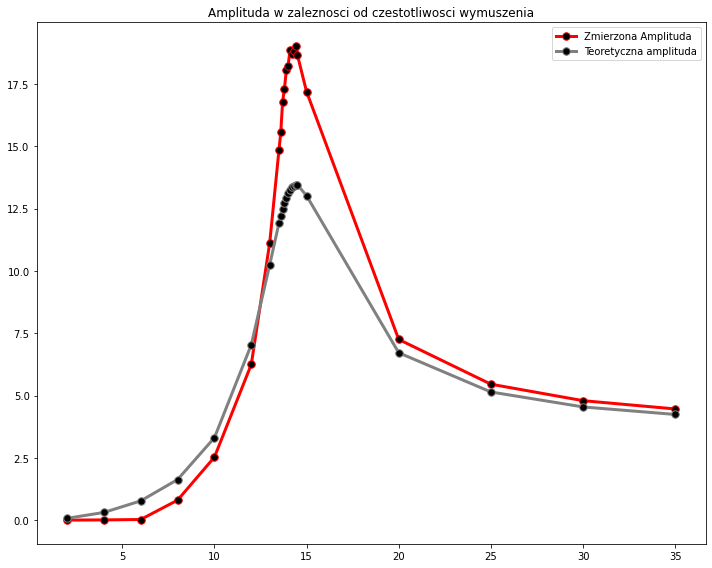

In [41]:
fig, ax = plt.subplots()
x = df_wymuszone["Czestotliwosc"]
y = df_wymuszone["Amplituda"]
ax.plot(x, y, color='r', linewidth=3, marker=".", markersize=15, markerfacecolor='black', label="Zmierzona Amplituda")
plt.rcParams['figure.figsize'] = [15, 9]

y = df_wymuszone["Ad"]
ax.plot(x, y, color='gray', linewidth=3, marker=".", markersize=15, markerfacecolor='black', label="Teoretyczna amplituda")

# for i, j in zip(x, y):
#     if j < df_wymuszone["Amplituda"].mean() or j == df_wymuszone["Amplituda"].max():
#         plt.text(i-3, j+0.4, f'({i}, {j})')
ax.set_title("Amplituda w zaleznosci od czestotliwosci wymuszenia")
plt.legend()
plt.show()